In [2]:
import pandas as pd
df = pd.read_csv('medicine_availability.csv')
df.head()

Doctor_Name Specialization  Available_Timings Available_Date  \
0  Dr. Swati Desai    Dermatology                 14     2024-10-01   
1   Dr. Anil Mehra     Pediatrics                 11     2024-10-02   
2   Dr. Ravi Kumar    Dermatology                  9     2024-10-03   
3  Dr. Swati Desai     Pediatrics                 12     2024-10-04   
4  Dr. Swati Desai     Pediatrics                 10     2024-10-05   

        Hospital_Name   Location Medicines_Available  Medicine_Stock  \
0       City Hospital    Kolkata          Medicine_5             136   
1       City Hospital     Mumbai         Medicine_13             333   
2  Govt Health Center  New Delhi         Medicine_20               3   
3       City Hospital    Kolkata         Medicine_16             162   
4      Metro Hospital    Kolkata         Medicine_14              77   

   Patient_Influx  Department_Size  Medicine_Demand  Stock_Restock_Frequency  \
0             335               85              263                       23   
1              72               38               31                       20   
2             133               81              118                        3   
3             456               81              209                        1   
4             352               85              202                       14   

   Doctor_Ratio  Medicine_Availability  
0          1.37                      0  
1          1.54                      1  
2          1.04                      0  
3          1.14                      0  
4          1.38                      0

In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
label_encoders = {}
for col in ['Doctor_Name', 'Specialization', 'Hospital_Name', 'Location', 'Medicines_Available']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
X = df.drop(['Medicine_Availability', 'Available_Date'], axis=1)
y = df['Medicine_Availability']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [16]:
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\Akshay\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
dnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6985 - loss: 0.5753 - val_accuracy: 0.8693 - val_loss: 0.2992
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.3313 - val_accuracy: 0.9040 - val_loss: 0.2202
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8792 - loss: 0.2557 - val_accuracy: 0.9360 - val_loss: 0.1619
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.2082 - val_accuracy: 0.9533 - val_loss: 0.1303
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9216 - loss: 0.1768 - val_accuracy: 0.9587 - val_loss: 0.1152
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9358 - loss: 0.1613 - val_accuracy: 0.9620 - val_loss: 0.0982
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9418 - loss: 0.1348 - val_accuracy: 0.9647 - val_loss: 0.0869
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9436 - loss: 0.1303 - val_accuracy: 0.

In [22]:
dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test, y_test)
print(f"DNN Model Accuracy: {dnn_accuracy * 100:.2f}%")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9801 - loss: 0.0432
DNN Model Accuracy: 98.56%


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels for the test set
y_pred = (dnn_model.predict(X_test) > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[ 989   17]
 [  19 1475]]


In [26]:
# Generate the classification report
cr = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:")
print(cr)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98      1006
     Class 1       0.99      0.99      0.99      1494

    accuracy                           0.99      2500
   macro avg       0.98      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



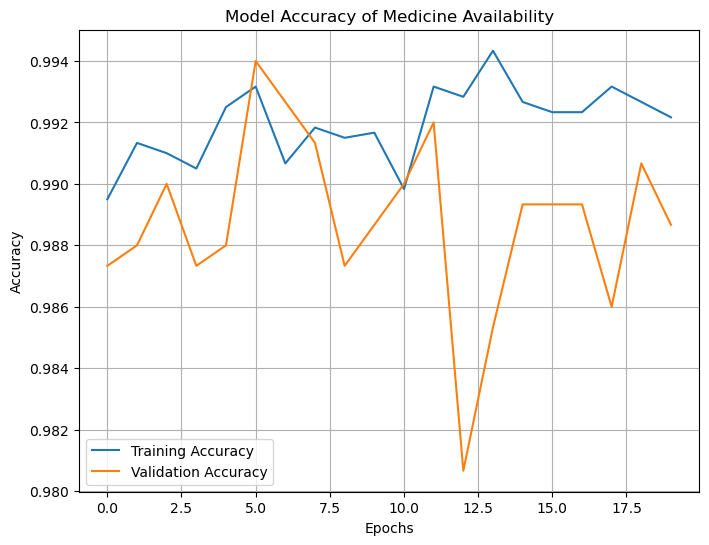

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Manual tracking arrays for accuracy
train_accuracies = []
val_accuracies = []

# Modify the training loop to manually store accuracies
for epoch in range(20):  # Replace 20 with the actual number of epochs
    # Train on the training data
    history = dnn_model.fit(
        X_train, y_train,
        epochs=1, batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    # Get accuracy for this epoch
    train_acc = history.history['accuracy'][0]
    val_acc = history.history['val_accuracy'][0]

    # Append accuracies
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy of Medicine Availability')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


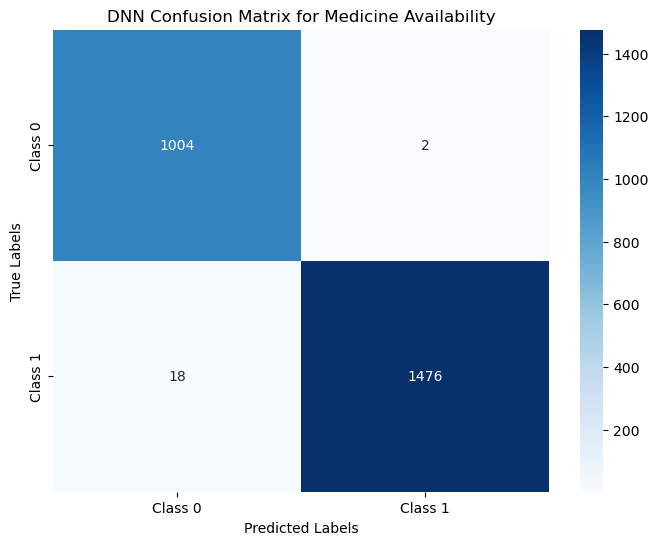

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = (dnn_model.predict(X_test) > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("DNN Confusion Matrix for Medicine Availability")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9787 - loss: 0.0439 - val_accuracy: 0.9840 - val_loss: 0.0346
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0394 - val_accuracy: 0.9860 - val_loss: 0.0342
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0349 - val_accuracy: 0.9833 - val_loss: 0.0330
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0411 - val_accuracy: 0.9860 - val_loss: 0.0288
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0389 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0398 - val_accuracy: 0.9860 - val_loss: 0.0297
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9866 - loss: 0.0332 - val_accuracy: 0.9907 - val_loss: 0.0237
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9849 - loss: 0.0382 - val_accuracy: 0.

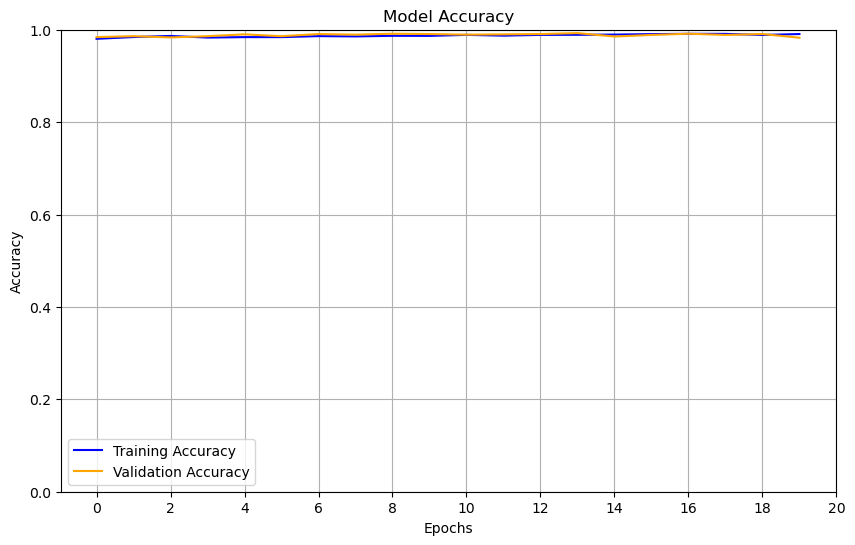

In [24]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the history object
history = dnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(range(0, 21, 2))  # Adjust x-ticks for better readability
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9897 - loss: 0.0252 - val_accuracy: 0.9873 - val_loss: 0.0323
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9910 - loss: 0.0223 - val_accuracy: 0.9853 - val_loss: 0.0320
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9916 - loss: 0.0183 - val_accuracy: 0.9887 - val_loss: 0.0267
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9919 - loss: 0.0226 - val_accuracy: 0.9920 - val_loss: 0.0209
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0185 - val_accuracy: 0.9873 - val_loss: 0.0270
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9945 - loss: 0.0193 - val_accuracy: 0.9880 - val_loss: 0.0245
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9926 - loss: 0.0181 - val_accuracy: 0.9873 - val_loss: 0.0320
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.

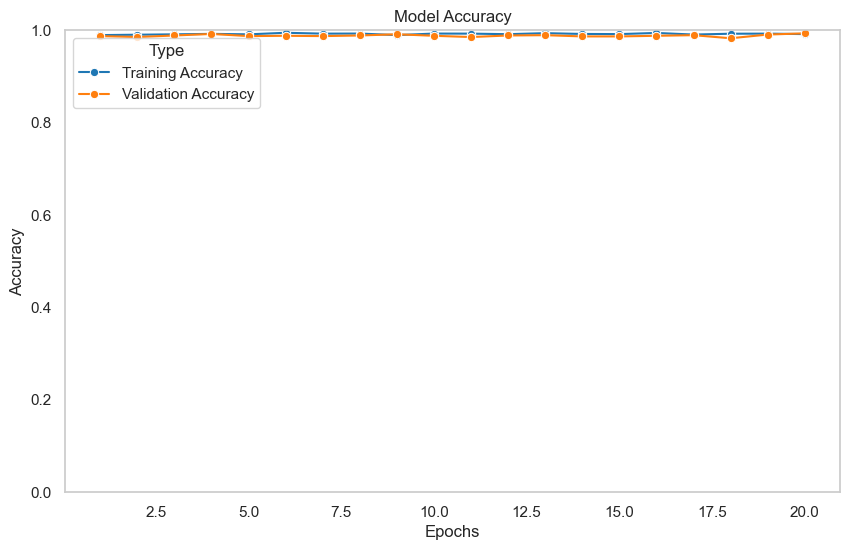

In [30]:
import seaborn as sns

# Assuming you have already trained your model and have the history object
history = dnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Create a DataFrame for easier plotting
accuracy_data = pd.DataFrame({
    'Epochs': range(1, 21),
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy']
})

# Melt the DataFrame for seaborn
accuracy_data_melted = accuracy_data.melt(id_vars='Epochs', var_name='Type', value_name='Accuracy')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=accuracy_data_melted, x='Epochs', y='Accuracy', hue='Type', palette='tab10', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits
plt.grid()
plt.show()

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

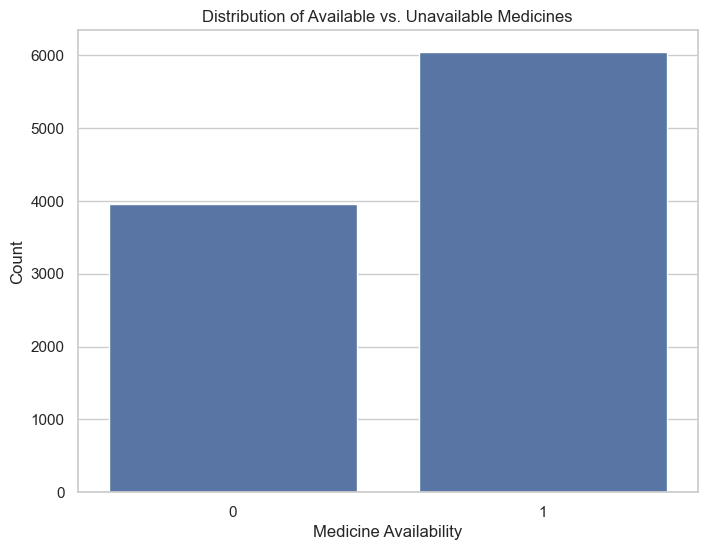

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Medicine_Availability')
plt.title('Distribution of Available vs. Unavailable Medicines')
plt.xlabel('Medicine Availability')
plt.ylabel('Count')
plt.show()

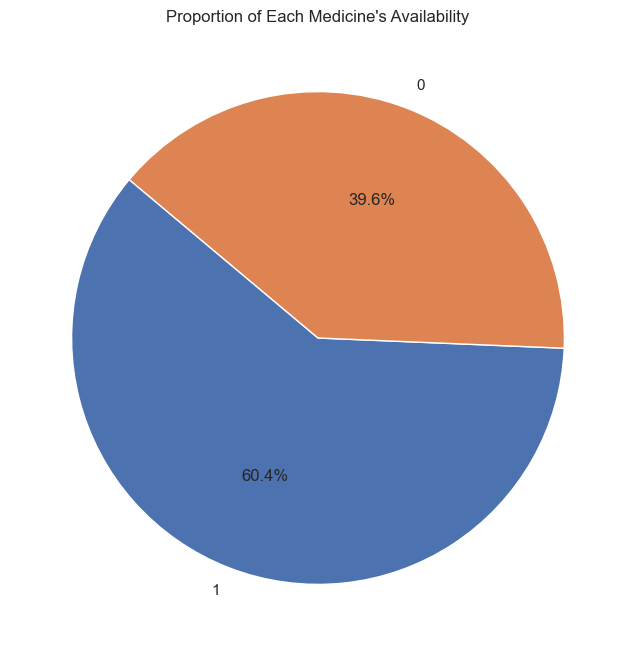

In [31]:
availability_counts = df['Medicine_Availability'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(availability_counts, labels=availability_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Medicine\'s Availability')
plt.show()

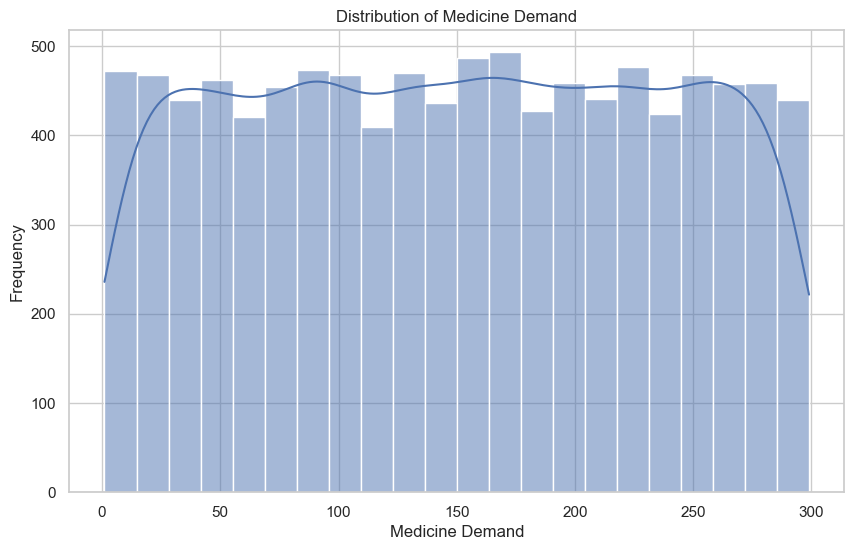

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Medicine_Demand'], kde=True)
plt.title('Distribution of Medicine Demand')
plt.xlabel('Medicine Demand')
plt.ylabel('Frequency')
plt.show()

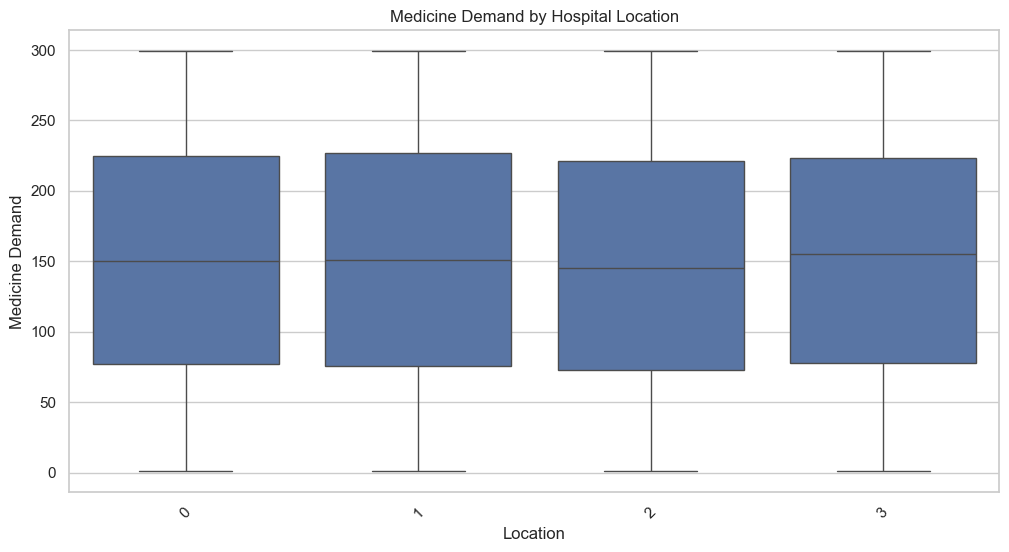

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Location', y='Medicine_Demand')
plt.title('Medicine Demand by Hospital Location')
plt.xlabel('Location')
plt.ylabel('Medicine Demand')
plt.xticks(rotation=45)
plt.show()

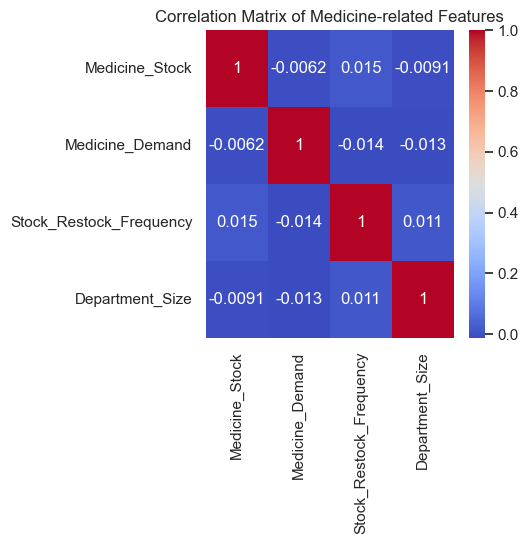

In [32]:
plt.figure(figsize=(4, 4))
sns.heatmap(df[['Medicine_Stock', 'Medicine_Demand', 'Stock_Restock_Frequency', 'Department_Size']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Medicine-related Features')
plt.show()

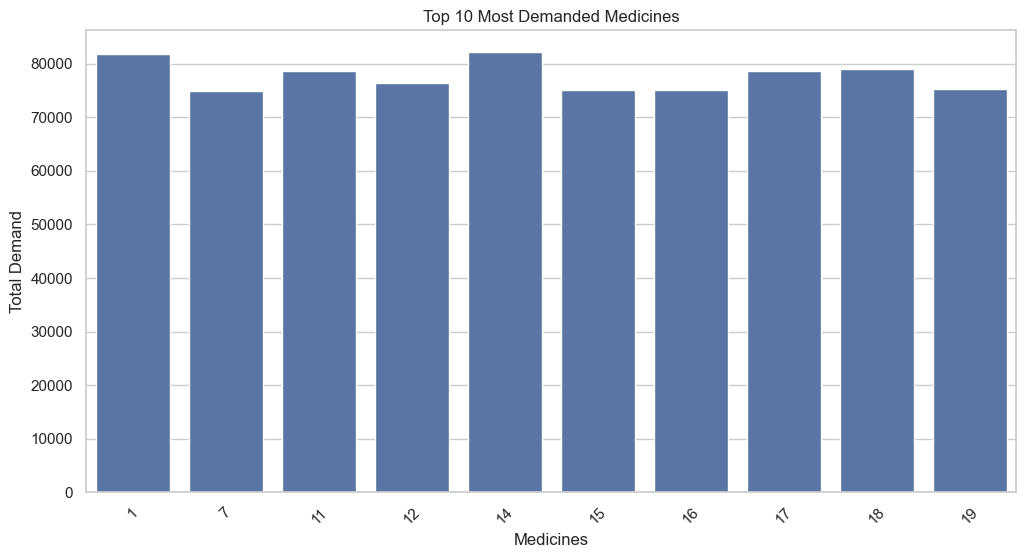

In [41]:
top_demanded_medicines = df.groupby('Medicines_Available')['Medicine_Demand'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_demanded_medicines.index, y=top_demanded_medicines.values)
plt.title('Top 10 Most Demanded Medicines')
plt.xlabel('Medicines')
plt.ylabel('Total Demand')
plt.xticks(rotation=45)
plt.show()

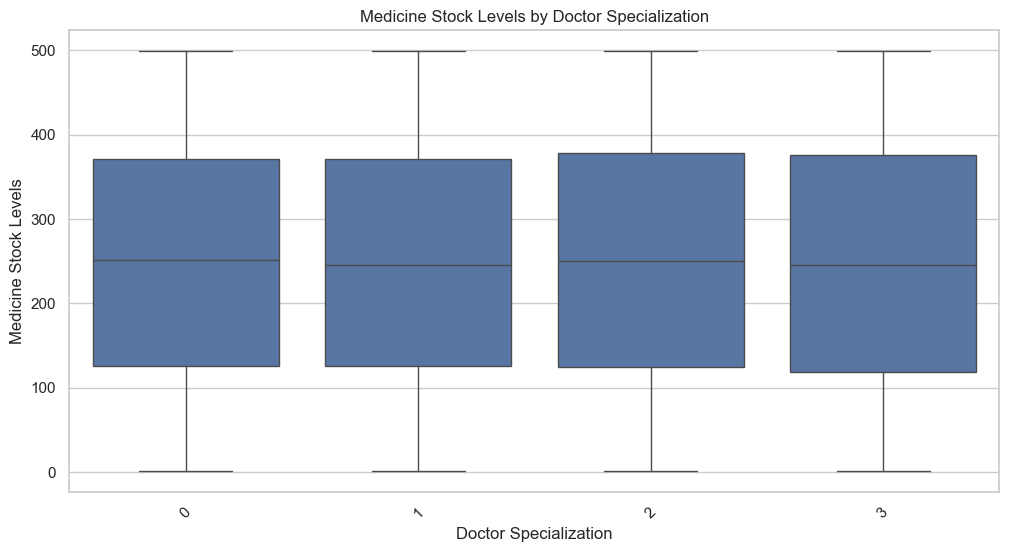

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Specialization', y='Medicine_Stock')
plt.title('Medicine Stock Levels by Doctor Specialization')
plt.xlabel('Doctor Specialization')
plt.ylabel('Medicine Stock Levels')
plt.xticks(rotation=45)
plt.show()

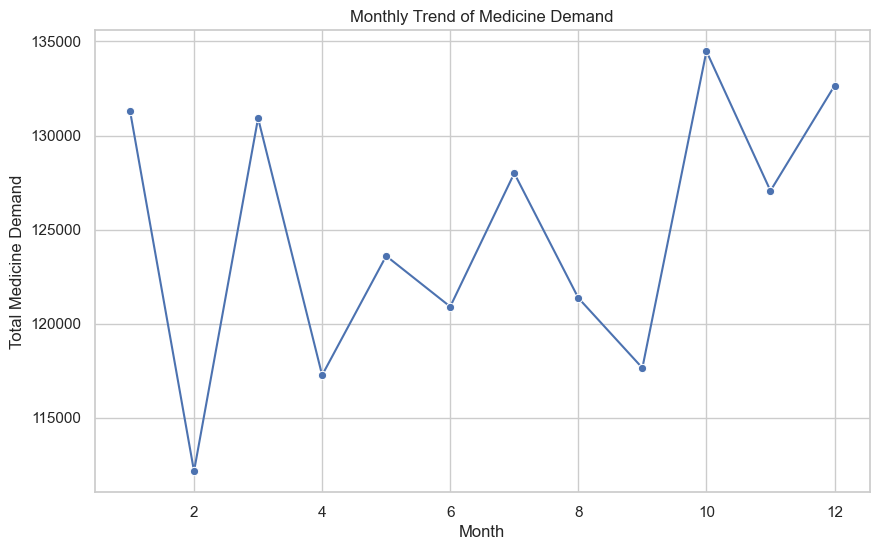

In [45]:
df['Available_Date'] = pd.to_datetime(df['Available_Date'])  # Convert to datetime if not already
df['Month'] = df['Available_Date'].dt.month
monthly_demand = df.groupby('Month')['Medicine_Demand'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_demand.index, y=monthly_demand.values, marker='o')
plt.title('Monthly Trend of Medicine Demand')
plt.xlabel('Month')
plt.ylabel('Total Medicine Demand')
plt.show()

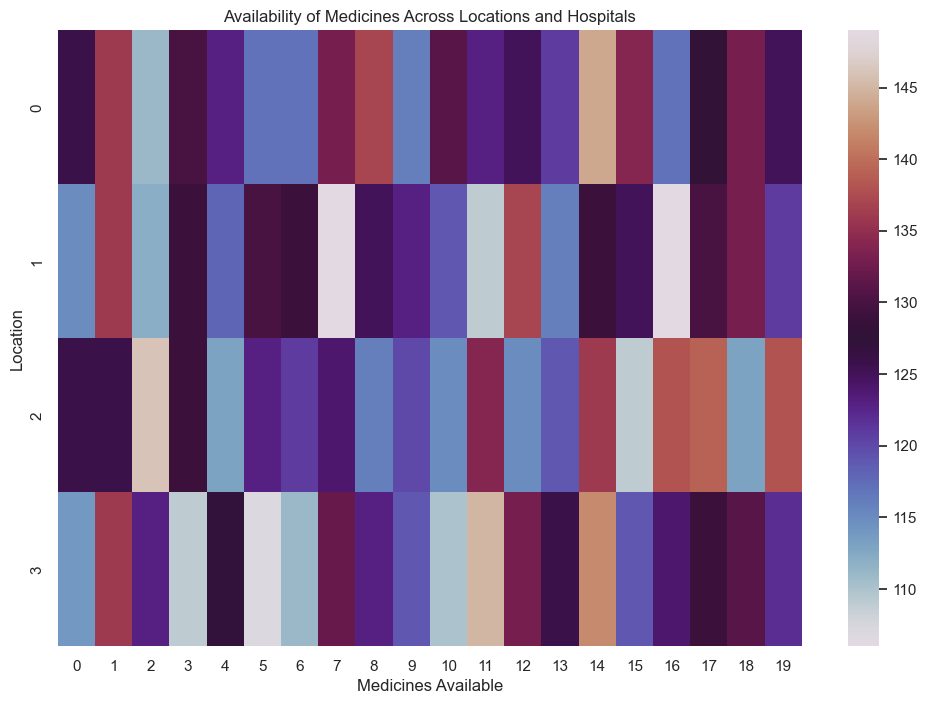

In [79]:
plt.figure(figsize=(12, 8))
medicine_location_matrix = pd.crosstab(df['Location'], df['Medicines_Available'])
sns.heatmap(medicine_location_matrix, annot=False, cmap='twilight', cbar=True)
plt.title('Availability of Medicines Across Locations and Hospitals')
plt.xlabel('Medicines Available')
plt.ylabel('Location')
plt.show()

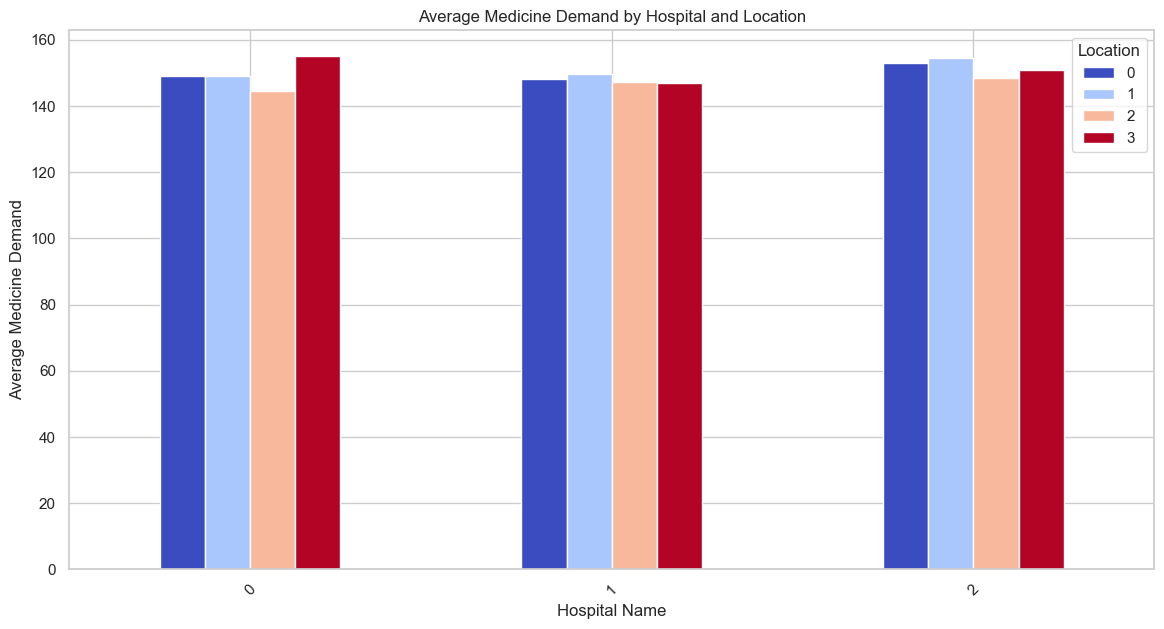

In [59]:
avg_demand_hospital_location = df.groupby(['Hospital_Name', 'Location'])['Medicine_Demand'].mean().unstack()
avg_demand_hospital_location.plot(kind='bar', stacked=False, figsize=(14, 7), colormap='coolwarm')
plt.title('Average Medicine Demand by Hospital and Location')
plt.xlabel('Hospital Name')
plt.ylabel('Average Medicine Demand')
plt.xticks(rotation=45)
plt.show()

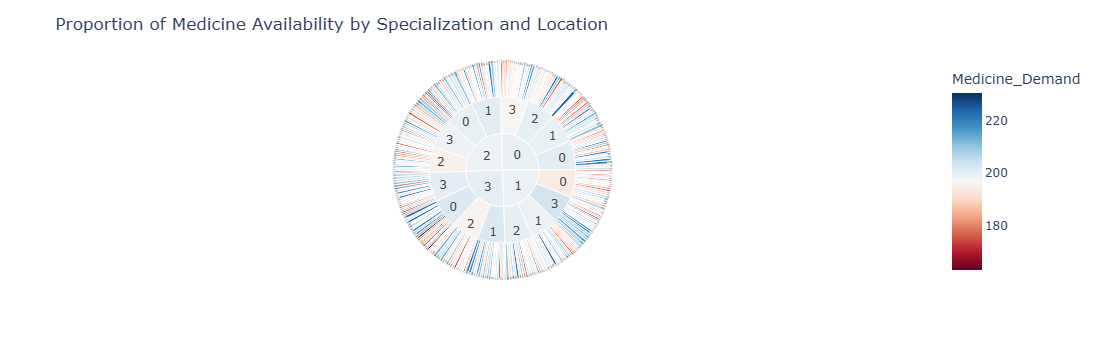

In [61]:
import plotly.express as px

fig = px.sunburst(df, path=['Specialization', 'Location', 'Medicines_Available'], values='Medicine_Demand',
                  color='Medicine_Demand', color_continuous_scale='RdBu')
fig.update_layout(title='Proportion of Medicine Availability by Specialization and Location')
fig.show()

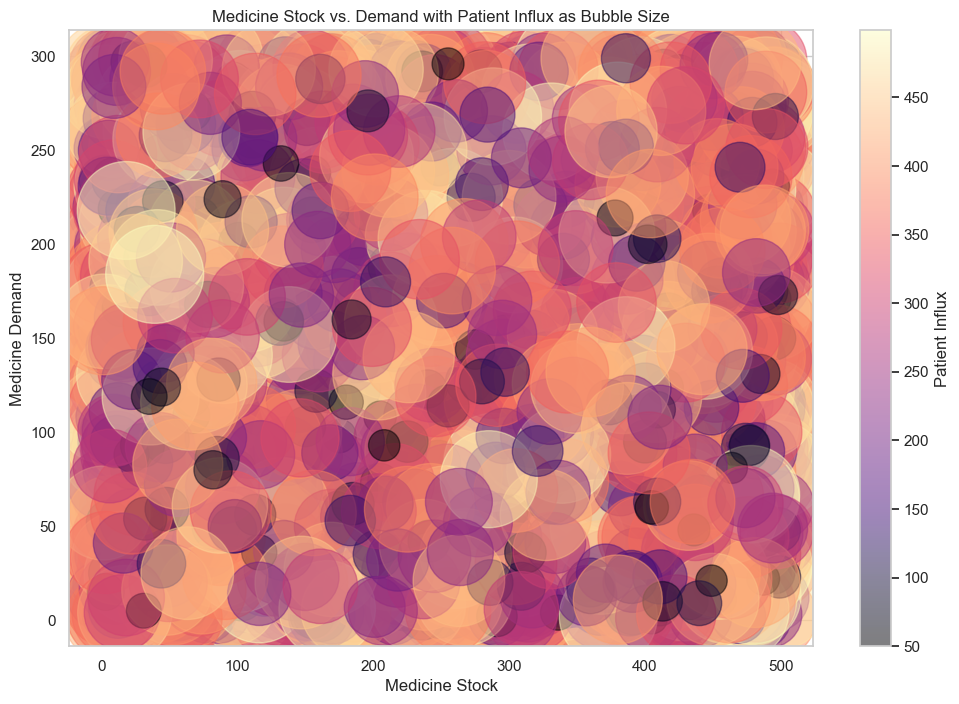

In [69]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Medicine_Stock'], df['Medicine_Demand'], s=df['Patient_Influx'] * 10, alpha=0.5, c=df['Patient_Influx'], cmap='magma')
plt.colorbar(label='Patient Influx')
plt.title('Medicine Stock vs. Demand with Patient Influx as Bubble Size')
plt.xlabel('Medicine Stock')
plt.ylabel('Medicine Demand')
plt.show()

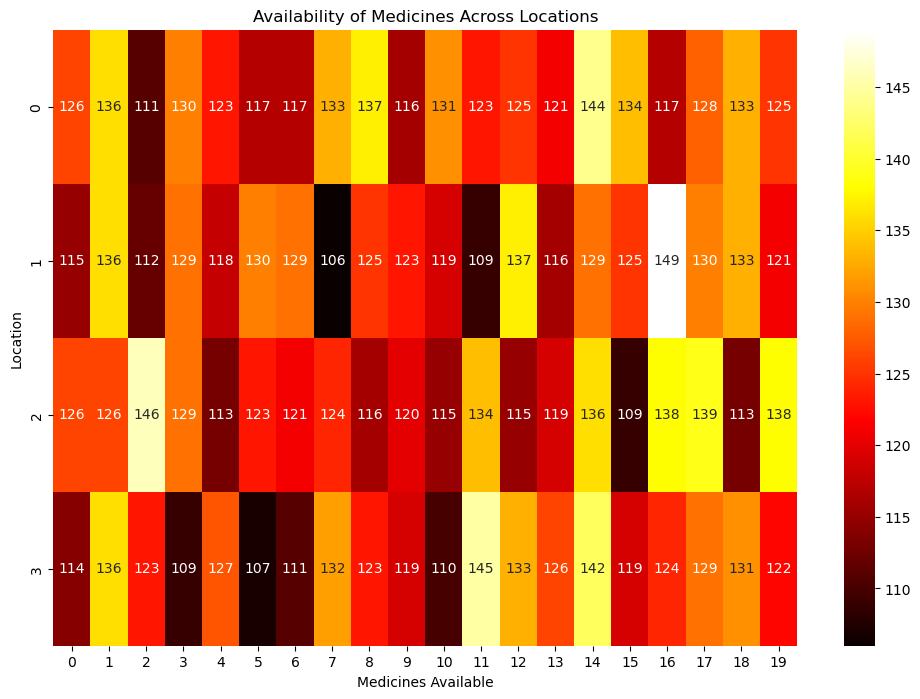

In [16]:
# Heatmap showing availability of each medicine across different locations
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set up a matrix to show medicine availability by location
medicine_location_matrix = pd.crosstab(df['Location'], df['Medicines_Available'])

plt.figure(figsize=(12, 8))
sns.heatmap(medicine_location_matrix, annot=True, fmt="d", cmap='hot', cbar=True)
plt.title('Availability of Medicines Across Locations')
plt.xlabel('Medicines Available')
plt.ylabel('Location')
plt.show()
